<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/goog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
# load the dataset
df = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=['Date'])
df = df[['Close']]
df.head()

,Close
Date,
2022-03-03,134.307999
2022-03-04,132.121994
2022-03-07,126.464500
2022-03-08,127.278503
2022-03-09,133.865997


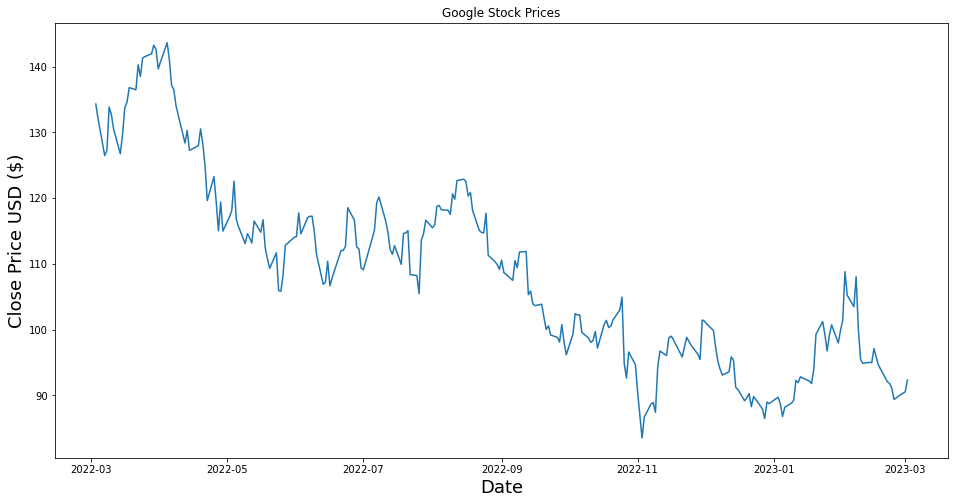

In [3]:
# visualize the dataset
plt.figure(figsize=(16,8))
plt.title('Google Stock Prices')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# preprocess the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [5]:
# split the data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
# define the RNN architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [7]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
5/5 [==============================] - 21s 106ms/step - loss: 0.0916
Epoch 2/25
5/5 [==============================] - 0s 93ms/step - loss: 0.0259
Epoch 3/25
5/5 [==============================] - 1s 171ms/step - loss: 0.0148
Epoch 4/25
5/5 [==============================] - 1s 194ms/step - loss: 0.0150
Epoch 5/25
5/5 [==============================] - 1s 199ms/step - loss: 0.0109
Epoch 6/25
5/5 [==============================] - 0s 96ms/step - loss: 0.0130
Epoch 7/25
5/5 [==============================] - 0s 87ms/step - loss: 0.0126
Epoch 8/25
5/5 [==============================] - 0s 90ms/step - loss: 0.0118
Epoch 9/25
5/5 [==============================] - 0s 89ms/step - loss: 0.0114
Epoch 10/25
5/5 [==============================] - 0s 95ms/step - loss: 0.0094
Epoch 11/25
5/5 [==============================] - 0s 89ms/step - loss: 0.0102
Epoch 12/25
5/5 [==============================] - 0s 93ms/step - loss: 0.0099
Epoch 13/25
5/5 [==============================] - 0s 91

In [9]:
# test the model
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = df.iloc[training_data_len:, :]['Close'].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 24ms/step


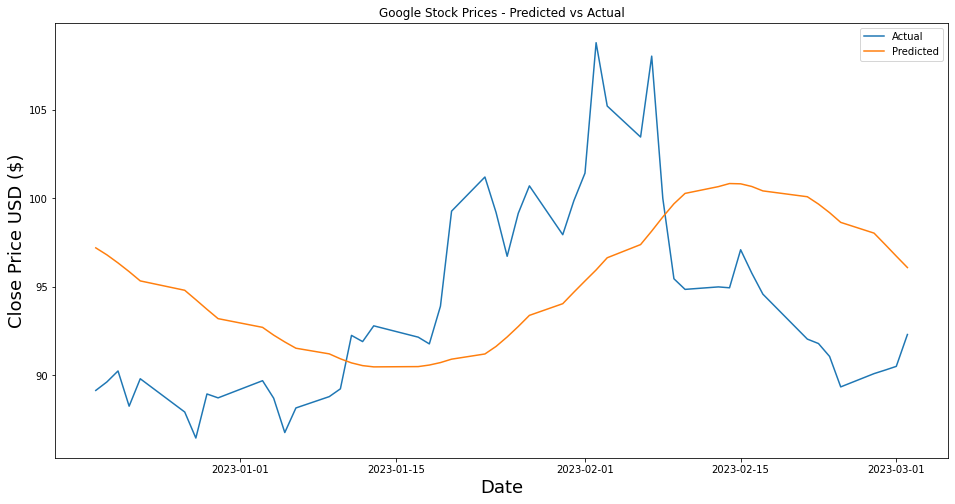

In [11]:
# visualize the predictions
plt.figure(figsize=(16,8))
plt.title('Google Stock Prices - Predicted vs Actual')
plt.plot(df.iloc[training_data_len:, :].index, y_test, label='Actual')
plt.plot(df.iloc[training_data_len:, :].index, predictions, label='Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()